# Reading Redline ASI (REGO) raw image data

Below we'll retrieve Redline ASI (REGO) data, read it, and do a bit of processing. An internet connection is required since we'll need to download data.

## Retrieve a minute of data

In [1]:
import requests

In [2]:
# 2020-03-21 06:30 UTC in Gillam, Manitoba, was a particularly good night
url = "https://data.phys.ucalgary.ca/sort_by_project/GO-Canada/REGO/stream0/2020/03/21/gill_rego-652/ut06/20200321_0630_gill_rego-652_6300.pgm.gz"
r = requests.get(url)

In [3]:
# save data to a local file
filename = "20200321_0630_gill_rego-652_6300.pgm.gz"
with open(filename, 'wb') as f:
    f.write(r.content)

## Read the data file

In [4]:
import rego_imager_readfile

In [5]:
img, meta, problematic_files = rego_imager_readfile.read(filename)

In [7]:
# the imager takes a picture every 3 seconds, so a 1-minute file usually contains 20 images
print("Image dimensions: %d x %d" % (img.shape[0], img.shape[1]))
print("Number of images: %d" % (img.shape[2]))

Image dimensions: 512 x 512
Number of images: 20


In [8]:
# data for the first image
img[:,:,0]

array([[351, 335, 329, ..., 309, 306, 311],
       [354, 346, 331, ..., 292, 287, 300],
       [352, 342, 336, ..., 328, 313, 296],
       ...,
       [337, 332, 331, ..., 317, 285, 286],
       [333, 315, 299, ..., 290, 305, 284],
       [314, 324, 313, ..., 312, 297, 286]], dtype=uint16)

In [9]:
# metadata for first image
meta[0]

{'Project unique ID': 'rego',
 'Site unique ID': 'gill',
 'Imager unique ID': 'rego-652',
 'Mode unique ID': '6300',
 'Geographic latitude': '56.376723',
 'Geographic longitude': '-94.643664',
 'Camera Model': 'Andor DZ936N-#BV',
 'Camera Serial Number': '15652',
 'Lens Serial Number': '123',
 'Filter Serial Number': '123',
 'CCD type': 'Andor E2V CCD42-40',
 'CCD xsize': '2048 pixels',
 'CCD ysize': '2048 pixels',
 'Pixel depth': '16 bits',
 'CCD xbinned': '4',
 'CCD ybinned': '4',
 'VSSpeed index': '0',
 'VS Amplitude index': '0',
 'VS Amplitude': '0',
 'High Capacity Toggle': '0',
 'Requested Pre Amp gain': '4.0',
 'Current HS Speed': '3.0 MHz',
 'Requested Exposure': '2',
 'Conf file set CCD temperature': '-65 (+- 5C)',
 'Computer name': 'gill-rego',
 'Operating System': 'Linux 3.10.0-957.21.3.el7.x86_64 #1 SMP Tue Jun 18 16:35:19 UTC 2019',
 'NTP target': '127.127.20.0',
 'NTP delay': '0.000',
 'NTP offset': '0.540',
 'NTP jitter': '30.104',
 'Mode sequence number': '5527',
 'VSSp

## Visualize the image

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt

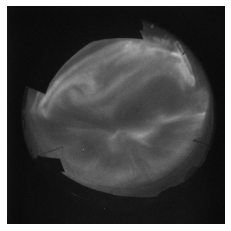

In [11]:
plt.imshow(img[:,:,0], cmap="gray")
plt.axis("off")
plt.show() 

# Let's scale the image so it's a bit brighter

In [12]:
# Pulled from SciPy. This function was depreated in 
# scipy v1.2.0, but it's quite useful for us.
import numpy as np
def bytescale(data, cmin=None, cmax=None, high=65535, low=0):
    if high > 65535:
        raise ValueError("`high` should be less than or equal to 65535.")
    if low < 0:
        raise ValueError("`low` should be greater than or equal to 0.")
    if high < low:
        raise ValueError("`high` should be greater than or equal to `low`.")

    if cmin is None:
        cmin = data.min()
    if cmax is None:
        cmax = data.max()

    cscale = cmax - cmin
    if cscale < 0:
        raise ValueError("`cmax` should be larger than `cmin`.")
    elif cscale == 0:
        cscale = 1

    scale = float(high - low) / cscale
    bytedata = (data - cmin) * scale + low
    return (bytedata.clip(low, high) + 0.5).astype(np.uint16)

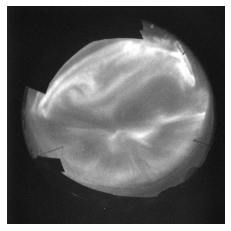

In [18]:
# scale the image with 200 as the floor and 800 as the ceiling, then display
im_scaled = bytescale(img[:,:,0], cmin=200, cmax=800)
plt.imshow(im_scaled, cmap="gray")
plt.axis("off")
plt.show() 

## Cleanup downloaded file

In [19]:
# remove the downloaded files
import os
os.remove(filename)